## Fruit Image Classification
### data source: https://www.kaggle.com/moltean/fruits

In [1]:
import time
start = time.time()

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
#import pandas as pd
import numpy as np
import tensorflow 
import keras
import h5py

Using TensorFlow backend.


In [3]:
#here, i reduced the size of the dataset. don't run again.
#import random

# for folder in os.listdir('fruits-360-cp/Test'):  # Go over each folder path
#     files = os.listdir('fruits-360-cp/Test/'+folder)# Get filenames in current folder
#     print(folder)
#     while len(files)>60:

#         files = random.sample(files, 30)  # Pick 900 random files
#         for file in files:  # Go over each file name to be deleted
#             f = os.path.join('fruits-360-cp/Test/'+folder +'/'+ file)  # Create valid path to file
#             os.remove(f) 


### multiclass classification 
#### all the fruits

In [4]:
from sklearn.datasets import load_files
#super useful
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html

In [5]:
def load_dataset(path):
    data=load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [6]:
X_train, y_train, target_labels = load_dataset('fruits-360-cp/Training')

In [7]:
print('training data loaded')

training data loaded


In [8]:
X_test, y_test, _ = load_dataset('fruits-360-cp/Test')

In [9]:
print('test data loaded')

test data loaded


In [10]:
print('Training set samples:', X_train.shape[0])
print('Test set samples:', X_test.shape[0])

Training set samples: 11398
Test set samples: 4752


In [11]:
n_class=120

In [12]:
print('number of categories: ', n_class)

number of categories:  120


In [13]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train, n_class)
y_test=np_utils.to_categorical(y_test, n_class)

In [14]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [15]:
def convert_to_array(pics):
    img_arr =[]
    for pic in pics:
        img_arr.append(img_to_array(load_img(pic)))
    return img_arr

In [16]:
X_train = np.array(convert_to_array(X_train))
X_test = np.array(convert_to_array(X_test))

In [17]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [18]:
print('data reshaped')
print('sample shape for model input: ',X_train[0].shape)

data reshaped
sample shape for model input:  (100, 100, 3)


In [19]:
#import all the pieces of the neural network
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from keras.layers import Convolution2D, MaxPooling2D #the convnet
from keras.utils import np_utils #extra tools
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [20]:
print('running Keras CNN model')

running Keras CNN model


In [21]:
#THE MODEL#
batch_size = 32
nb_classes = n_class
nb_epoch = 2

img_rows =100
img_cols=100
img_channels = 3

model_input=Input(shape=(img_rows, img_cols,img_channels))

x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(64, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x1 = Dense(nb_classes, activation='softmax')(conv_out)

lst = [x1]

model = Model(input=model_input, output=lst) 

model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)
#set verbose to 0 if you run many, 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
11398/11398 [==============================] - 116s 10ms/step - loss: 0.8521 - accuracy: 0.8038
Epoch 2/2
11398/11398 [==============================] - 109s 10ms/step - loss: 0.0568 - accuracy: 0.9829


In [22]:
y_pred = model.predict(X_test)

In [23]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.81144779920578


In [ ]:
print("VISUALIZATION OF TEST PREDICTIONS")

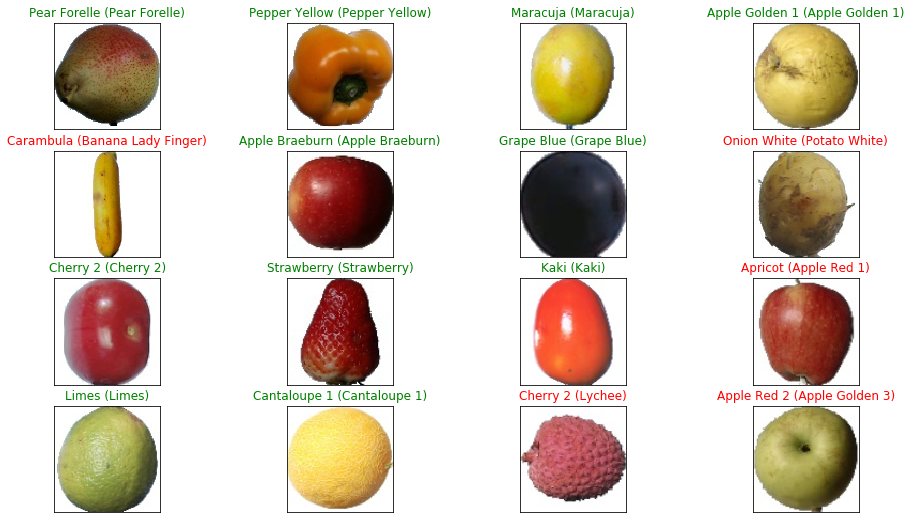

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
plt.savefig('foo2.png')

from PIL import Image
img=Image.open('foo2.png')
img.show()

In [25]:
end = time.time()
print("total runtime: ",(end - start))

total runtime:  310.29136085510254


In [53]:
from matplotlib import image
import os
from os import listdir
import cv2

#load images - need to convert pixels to numpy arrays 
def load_fruit_pics(dir_path):
    loaded_images = []
    data_labels = []
    for filename in listdir(dir_path):
        # load image
        img_data = image.imread(dir_path + filename)
        # store loaded image
        img_data=cv2.resize(img_data, (100,100))
        loaded_images.append(img_data)
        data_labels.append(filename.split('.')[0])
        #print('> loaded %s %s' % (filename, img_data.shape))
    return loaded_images, data_labels


mult_pxl, mult_label=load_fruit_pics('fruits-360-cp/new_images/')

In [54]:
mult_pxl=np.array(mult_pxl)

In [ ]:
print("PRINT OUT AND VISUALIZATION OF IMAGES COLLECTED FROM GOOGLE")

In [55]:
i=0
pred_list=[]
for pic in mult_pxl:
    pic=pic.astype('float32')
    pic/=255
    pic=pic.reshape(1,100,100,3)
    y_pred=model.predict(pic)
    pred_label=np.argmax(y_pred)
    print('------------')
    #print(pred_label)
    print("predicted: ",target_labels[pred_label])
    pred_list.append(target_labels[pred_label])
    print("actual: ",mult_label[i])
    i=i+1
    

------------
predicted:  Carambula
actual:  cactus_fruits
------------
predicted:  Pineapple Mini
actual:  sliced_coconut
------------
predicted:  Strawberry Wedge
actual:  avocado1
------------
predicted:  Pineapple Mini
actual:  coconut
------------
predicted:  Melon Piel de Sapo
actual:  pineapple
------------
predicted:  Banana Red
actual:  apple2
------------
predicted:  Pear Red
actual:  apple_clipart
------------
predicted:  Eggplant
actual:  avocado2
------------
predicted:  Banana Red
actual:  cherry1
------------
predicted:  Cauliflower
actual:  cauliflower_florets
------------
predicted:  Papaya
actual:  Bananas(lady_finger)5
------------
predicted:  Papaya
actual:  whole_coconut
------------
predicted:  Pear Red
actual:  tomato
------------
predicted:  Banana
actual:  banana1
------------
predicted:  Melon Piel de Sapo
actual:  avocado3
------------
predicted:  Physalis with Husk
actual:  pepino_melon_sliced
------------
predicted:  Pineapple
actual:  banana_lady_finger
---

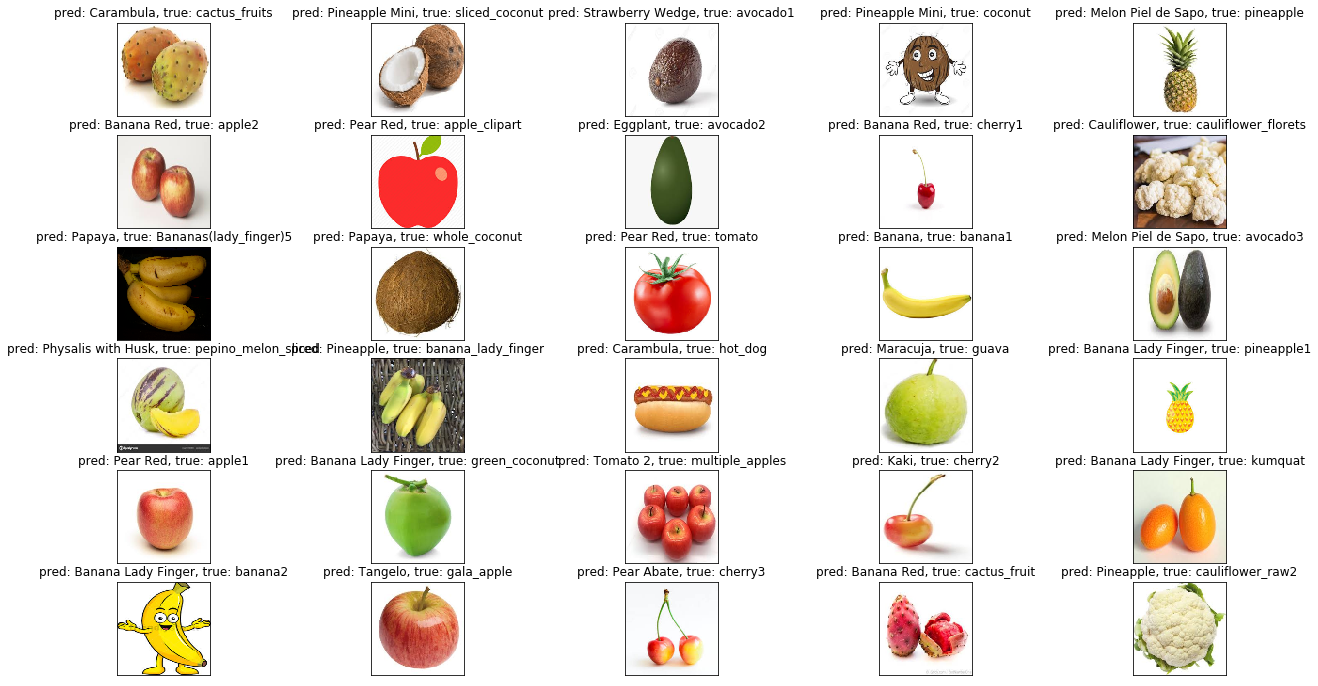

In [58]:
#import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(22, 12))
i=0
for pic in mult_pxl:
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pic.astype('uint8'))
    pred_label=pred_list[i]
    true_idx = mult_label[i]
    ax.set_title("pred: {}, true: {}".format(pred_label, true_idx))
    i=i+1

plt.savefig('foo3.png')

from PIL import Image
img=Image.open('foo3.png')
img.show()